# Loan Modelling : Predictive Models

In [1]:
#Importing of the datasets
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import numpy as np
%matplotlib inline

import itertools
import matplotlib.pyplot as plt

### Loading of the datasets to be modeled

In [2]:
#dat
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,0:13]
Y= dataset.iloc[:,-1]
X=dataset.drop(['ID','ZIP Code','Personal Loan'],axis='columns')

In [3]:
#Training and Splittong test data to be used to build Predictive Models
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [4]:
print(X_train.shape)
print(X_test.shape)

(4000, 11)
(1000, 11)


In [5]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [6]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [7]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 11)
(1000, 11)
(4000,)
(1000,)


# PREDICTIVE MODELS WHICH WERE USED FOR LOAN MODELLING 

## 1. Logistic Regression   2. Random Forest Classifier  3. Decision Tree Classifier
## 4 . Naive Bayes Algorithm  5. Support Vector Machine Algorithm

# Logistic Regression Predictive Model

In [9]:

#Importing the linear regression Models
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
#Retrieving a classification report of precision,recall,f1-score and support
b = classification_report(Y_test,Y_pred) 
print(b)

#Finding Probabilites
var_prob = classifier.predict_proba(X_test)
var_prob[0:,]


#Checking for accuracy and errors with the use of confusion matrix
#predicited scores against error calculated scores 
cm = confusion_matrix(Y_test,Y_pred)
print('Cm for lositic regression is',cm)

#train the model

print('Accuracy of logisitc regression model is',classifier.score(X_test,Y_test)*100)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.86      0.60      0.71        90

    accuracy                           0.95      1000
   macro avg       0.91      0.80      0.84      1000
weighted avg       0.95      0.95      0.95      1000

Cm for lositic regression is [[901   9]
 [ 36  54]]
Accuracy of logisitc regression model is 95.5


C:\Users\Gameitup\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
cm = confusion_matrix(Y_test,Y_pred)

In [14]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[901   9]
 [ 36  54]]


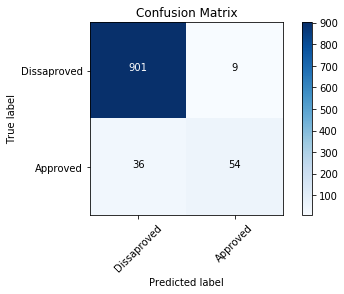

In [12]:
cm_plot_labels = ['0','Approved']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

#  Random Forest Classifiers

In [13]:
#Predcition Model of random forest classifier
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
cls.fit(X_train,Y_train)

Y_pred =  cls.predict(X_test)
a = classification_report(Y_test,Y_pred)
print(a)
print('Accuracy of random forest classifier',cls.score(X_test,Y_test)*100)

cm = confusion_matrix(Y_test,Y_pred)
print('Cm for RandomForestclassifier is',cm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.93      0.90      0.92        90

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy of random forest classifier 98.5
Cm for RandomForestclassifier is [[904   6]
 [  9  81]]


Confusion matrix, without normalization
[[904   6]
 [  9  81]]


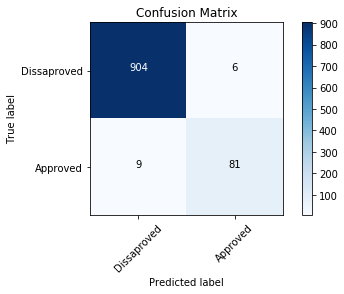

In [14]:
cm_plot_labels = ['Dissaproved','Approved']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

# Decision Tree Classifier Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
classifier2.fit(X_train,Y_train)

Y_pred = classifier2.predict(X_test)
c = classification_report(Y_test,Y_pred)
print(c)
print('Accuracy of Decision Trree is',classifier2.score(X_test,Y_test)*100,'%')


cm = confusion_matrix(Y_test,Y_pred)
print('Cm for Decision Tree is',cm)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.92      0.90      0.91        90

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy of Decision Trree is 98.4 %
Cm for Decision Tree is [[903   7]
 [  9  81]]


Confusion matrix, without normalization
[[903   7]
 [  9  81]]


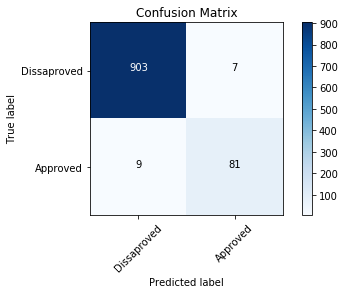

In [16]:
cm_plot_labels = ['Dissaproved','Approved']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

# Naive Bayes Algorithm

In [15]:
#Naive Bayes algorithm for loan Modelling 
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train,Y_train)
Y_pred = classifier3.predict(X_test)

d = classification_report(Y_test,Y_pred)
print(d)
print('Accuracy of Naive Bayes algorithm',classifier3.score(X_test,Y_test)*100)

cm = confusion_matrix(Y_test,Y_pred)
print('Cm for Naives Bayes algithm',cm)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       910
           1       0.43      0.61      0.50        90

    accuracy                           0.89      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.89      0.90      1000

Accuracy of Naive Bayes algorithm 89.2
Cm for Naives Bayes algithm [[837  73]
 [ 35  55]]


Confusion matrix, without normalization
[[837  73]
 [ 35  55]]


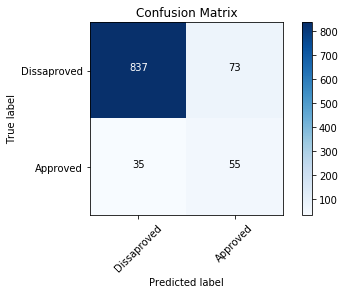

In [17]:
cm_plot_labels = ['Dissaproved','Approved']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

# Support Vector Machine Predictive Model

In [19]:
#Support Vector Machine Learning Model 
from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf',random_state=0)
classifier4.fit(X_train,Y_train)


Y_pred = classifier4.predict(X_test)
e = classification_report(Y_test,Y_pred)
print(e)
print('Accuracy of Support Vector Machine learning algorithm',classifier4.score(X_test,Y_test)*100)

cm = confusion_matrix(Y_test,Y_pred)
print('Cm for Support Vector',cm)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       910
           1       0.59      0.11      0.19        90

    accuracy                           0.91      1000
   macro avg       0.75      0.55      0.57      1000
weighted avg       0.89      0.91      0.88      1000

Accuracy of Support Vector Machine learning algorithm 91.3
Cm for Support Vector [[903   7]
 [ 80  10]]


Confusion matrix, without normalization
[[903   7]
 [ 80  10]]


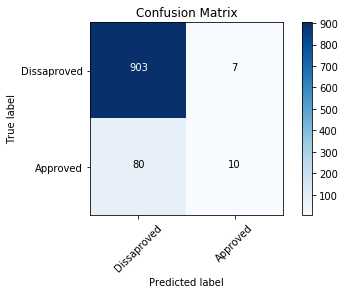

In [79]:
cm_plot_labels = ['Dissaproved','Approved']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

# Linear Discriminant Analysis Predictive Models

In [21]:
#Linear discriminat analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis(solver='lsqr')
clf_lda.fit(X_train,Y_train)
Y_pred = clf_lda.predict(X_test)

Y_pred = clf_lda.predict(X_test)
e = classification_report(Y_test,Y_pred)
print(e)
print('Accuracy of  Linear Discriminant analysis  learning algorithm',clf_lda.score(X_test,Y_test)*100)

cm = confusion_matrix(Y_test,Y_pred)
print('Cnfusion for Support Vector',cm)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       910
           1       0.74      0.62      0.67        90

    accuracy                           0.95      1000
   macro avg       0.85      0.80      0.82      1000
weighted avg       0.94      0.95      0.94      1000

Accuracy of  Linear Discriminant analysis  learning algorithm 94.6
Cnfusion for Support Vector [[890  20]
 [ 34  56]]


Confusion matrix, without normalization
[[890  20]
 [ 34  56]]


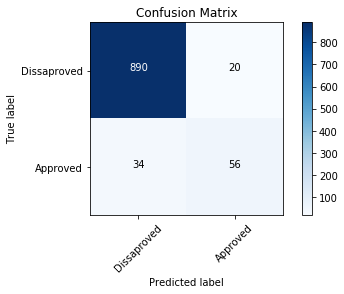

In [22]:
cm_plot_labels = ['Dissaproved','Approved']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')